In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install SALib
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
import statsmodels.api as sm
import plotting_theme

df = pd.read_csv("../results/combined_results_snellius.csv")

#Show first lines
df.head()


,run_id,temperature,rationality,consensus_reached,rounds_to_consensus,total_rounds,final_leading_margin,polarisation_start,polarisation_peak,polarisation_final,max_gridlock_span,gridlock_end_round,mean_switches_per_agent,switch_probability_per_round,mean_switches_per_round,run_outcome,winner_name
0,temp_0_50_rat_0_75_13_run_13_spoulain,0.5,0.75,True,4,4,18,0.001420,0.002523,0.002149,0,NaN,0.22,0.055000,2.750000,CONSENSUS,Luis Antonio Gokim Tagle
1,temp_0_50_rat_0_75_20_run_17_kverlaan,0.5,0.75,True,9,9,16,0.001541,0.002256,0.002256,0,NaN,0.44,0.048889,2.444444,CONSENSUS,Luis Antonio Gokim Tagle
2,temp_0_50_rat_0_75_37_run_5_mbelkhatir,0.5,0.75,True,25,25,18,0.004202,0.004202,0.002543,0,NaN,0.94,0.037600,1.880000,CONSENSUS,Luis Antonio Gokim Tagle
3,temp_0_50_rat_0_75_22_run_19_kverlaan,0.5,0.75,True,6,6,16,0.001319,0.003169,0.003069,0,NaN,0.20,0.033333,1.666667,CONSENSUS,Luis Antonio Gokim Tagle
4,temp_0_50_rat_0_75_51_run_9_kverlaan,0.5,0.75,True,13,13,19,0.001788,0.004354,0.004354,0,NaN,0.52,0.040000,2.000000,CONSENSUS,Luis Antonio Gokim Tagle


OFAT : LOCAL ANALYSIS. 

We start witht temperature first, with rationality fixed. We analyse for every output( mean number of rounds, winner distributions, proportion of final vote treshold met)

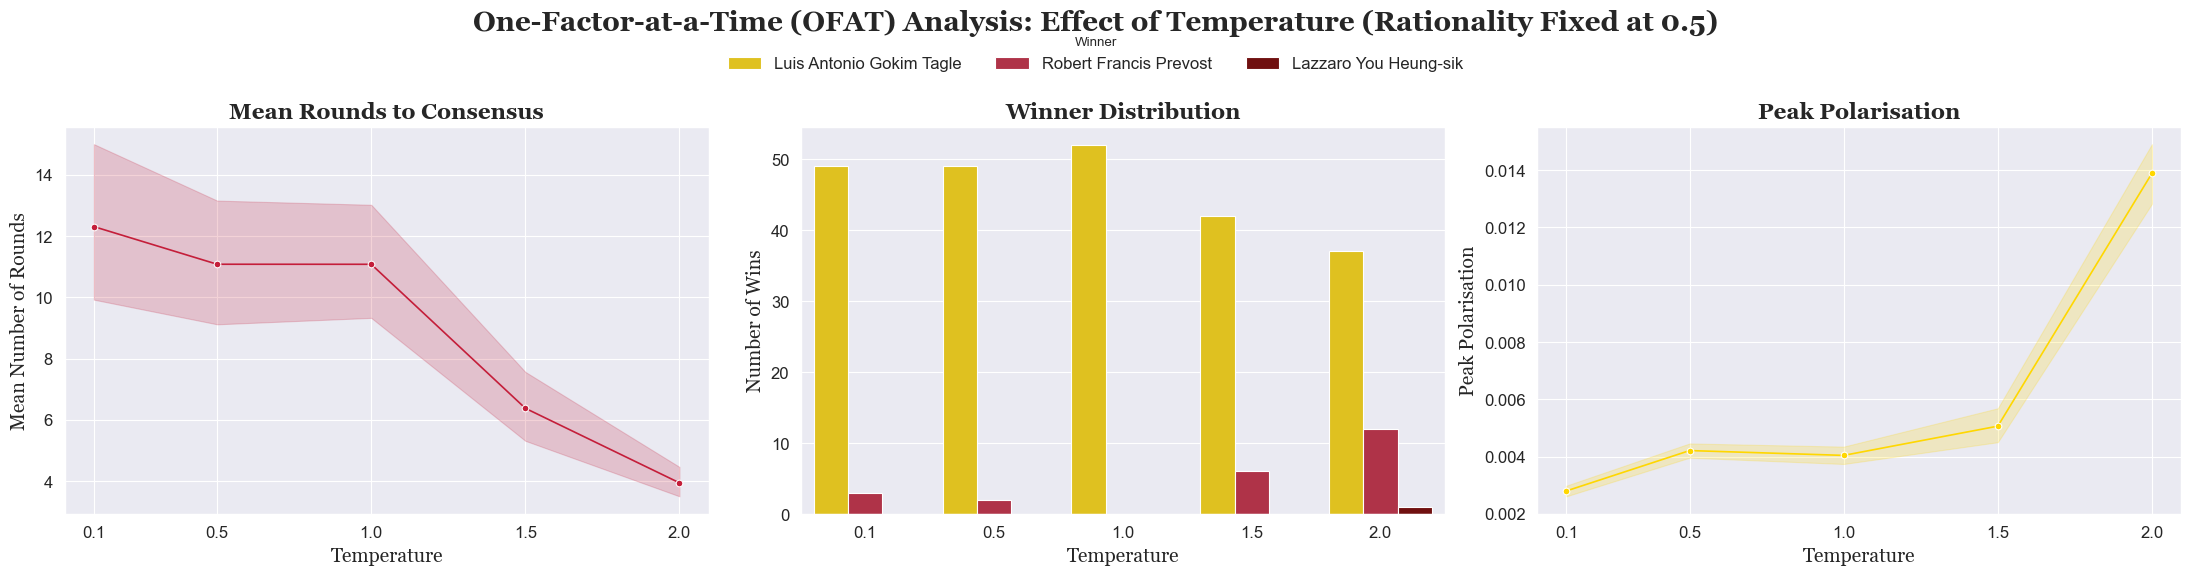

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure your plotting_theme is imported at the top of your notebook
# import plotting_theme

# Load your dataframe 'df' here if it's not already loaded
# df = pd.read_csv(...)

# To match the background style of other plots, we can set the style here.
# For true consistency, it's best to change style='whitegrid' to style='darkgrid' in your plotting_theme.py file.
sns.set_style("darkgrid")

# --- Create the 3-panel figure ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6), dpi=100)
fig.suptitle('One-Factor-at-a-Time (OFAT) Analysis: Effect of Temperature (Rationality Fixed at 0.5)', fontsize=20, fontweight='bold', fontdict={'family': 'Georgia'})

# Filter data for the OFAT analysis
ofat_df = df[df['rationality'] == 0.5].copy()

# --- Plot 1: Mean Number of Rounds vs Temperature (Line Plot) ---
sns.lineplot(
    x='temperature', 
    y='rounds_to_consensus', 
    data=ofat_df, 
    ax=axes[0],
    marker='o',
    err_style="band",
    color=plotting_theme.papal_colors[1] # Use Cardinal Red
)
axes[0].set_title('Mean Rounds to Consensus', fontweight='bold', fontdict={'family': 'Georgia'})
axes[0].set_xlabel('Temperature', fontdict={'family': 'Georgia'})
axes[0].set_ylabel('Mean Number of Rounds', fontdict={'family': 'Georgia'})
axes[0].set_xticks(ofat_df['temperature'].unique()) # Ensure all temp levels are marked

# --- Plot 2: Winner Distribution by Temperature (Count Plot) ---
sns.countplot(
    x='temperature', 
    hue='winner_name', 
    data=ofat_df, 
    ax=axes[1]
)
axes[1].set_title('Winner Distribution', fontweight='bold', fontdict={'family': 'Georgia'})
axes[1].set_xlabel('Temperature', fontdict={'family': 'Georgia'})
axes[1].set_ylabel('Number of Wins', fontdict={'family': 'Georgia'})
# The legend will be created for the whole figure later

# --- Plot 3: Peak Polarisation vs Temperature (Line Plot) ---
sns.lineplot(
    x='temperature', 
    y='polarisation_peak', 
    data=ofat_df, 
    ax=axes[2],
    marker='o',
    err_style="band",
    color=plotting_theme.papal_colors[0] # Use Gold
)
axes[2].set_title('Peak Polarisation', fontweight='bold', fontdict={'family': 'Georgia'})
axes[2].set_xlabel('Temperature', fontdict={'family': 'Georgia'})
axes[2].set_ylabel('Peak Polarisation', fontdict={'family': 'Georgia'})
axes[2].set_xticks(ofat_df['temperature'].unique())

# --- Final Touches ---
# Get handles and labels from the winner distribution plot for a shared legend
handles, labels = axes[1].get_legend_handles_labels()
# Remove the individual legend from the middle plot
if axes[1].get_legend() is not None:
    axes[1].get_legend().remove()
# Create a shared legend for the entire figure, placed at the top
fig.legend(handles, labels, title='Winner', loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=3, frameon=False)


plt.tight_layout(rect=[0, 0.03, 1, 0.92]) # Adjust layout to make room for suptitle and legend
plt.savefig("OFAT_styled.png", dpi=300)
plt.show()



Now, we fix temperature, and vary rationality. 

In [17]:
# Choose the value of temperature to fix
default_temperature = 0.5

# Filter the DataFrame for the fixed temperature value
df_fixed = df[df['temperature'] == default_temperature]

print(f"OFAT analysis for rationality (temperature fixed at {default_temperature})\n")

for rat in sorted(df_fixed['rationality'].unique()):
    subset = df_fixed[df_fixed['rationality'] == rat]
    print(f"Rationality = {rat}")
    print(f"  Mean number of rounds: {subset['rounds_to_consensus'].mean():.2f}")
    print(f"  Winner distribution:")
    print(subset['winner_name'].value_counts())
    print(f"  Proportion of consensus_reached (True): {subset['consensus_reached'].mean():.2%}")
    print("-" * 40)

OFAT analysis for rationality (temperature fixed at 0.5)

Rationality = 0.0
  Mean number of rounds: 12.19
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    50
Robert Francis Prevost       4
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.25
  Mean number of rounds: 8.96
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    49
Robert Francis Prevost       1
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.5
  Mean number of rounds: 11.08
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    49
Robert Francis Prevost       2
Name: count, dtype: int64
  Proportion of consensus_reached (True): 100.00%
----------------------------------------
Rationality = 0.75
  Mean number of rounds: 12.72
  Winner distribution:
winner_name
Luis Antonio Gokim Tagle    52
Robert Francis Prevost       1
Name: 

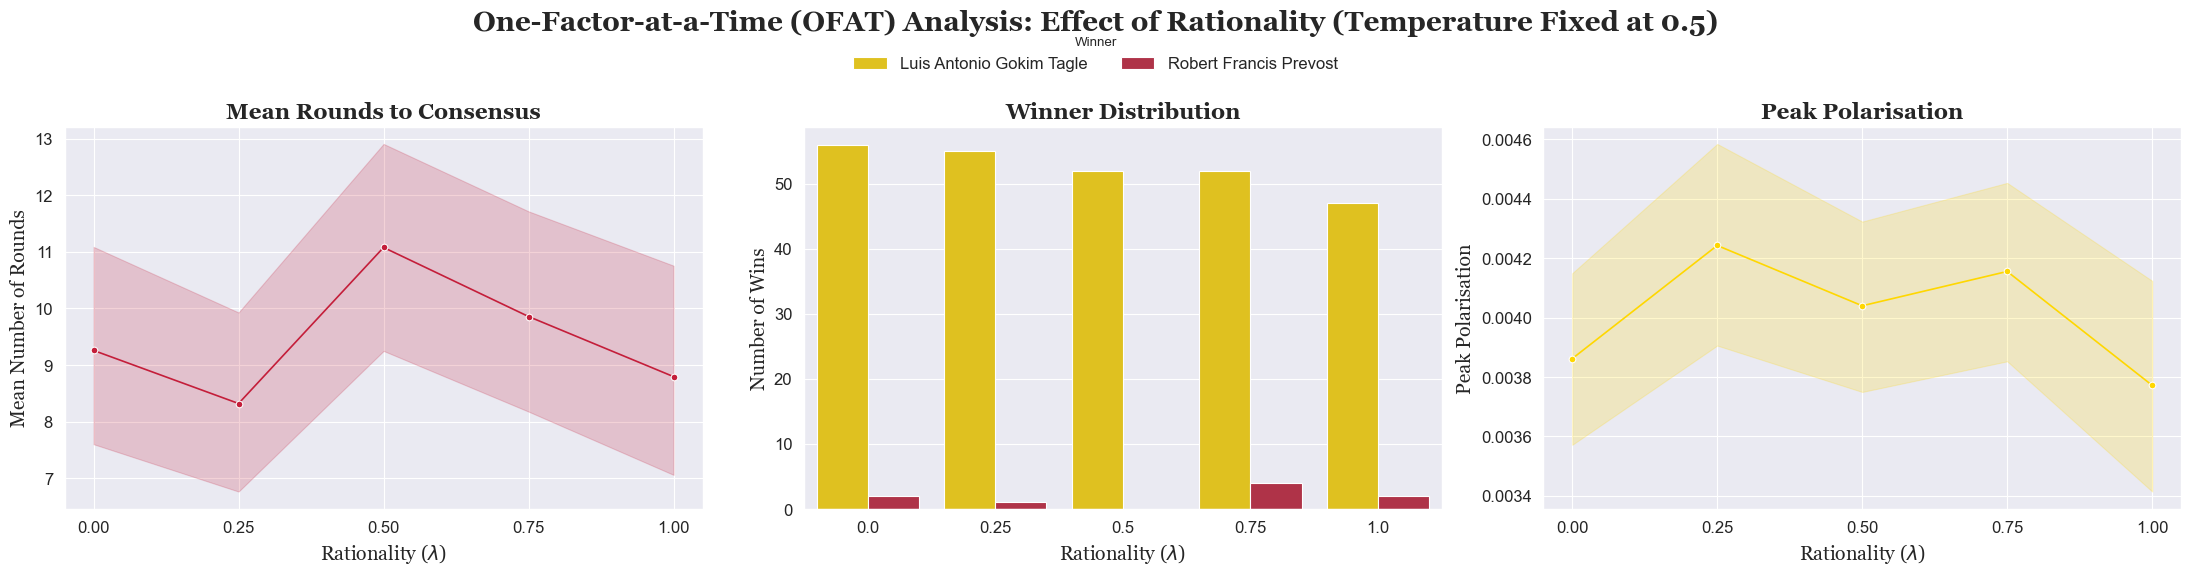

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure your plotting_theme is imported at the top of your notebook
# import plotting_theme

# Load your dataframe 'df' here if it's not already loaded
# df = pd.read_csv(...)

# To match the background style of other plots, we can set the style here.
# For true consistency, it's best to change style='whitegrid' to style='darkgrid' in your plotting_theme.py file.
sns.set_style("darkgrid")

# --- Create the 3-panel figure ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6), dpi=100)
fig.suptitle('One-Factor-at-a-Time (OFAT) Analysis: Effect of Rationality (Temperature Fixed at 0.5)', fontsize=20, fontweight='bold', fontdict={'family': 'Georgia'})

# Filter data for the OFAT analysis (fixing temperature at its median value)
reference_temperature = df['temperature'].median()
ofat_df_rat = df[df['temperature'] == reference_temperature].copy()

# --- Plot 1: Mean Number of Rounds vs Rationality (Line Plot) ---
sns.lineplot(
    x='rationality', 
    y='rounds_to_consensus', 
    data=ofat_df_rat, 
    ax=axes[0],
    marker='o',
    err_style="band",
    color=plotting_theme.papal_colors[1] # Use Cardinal Red
)
axes[0].set_title('Mean Rounds to Consensus', fontweight='bold', fontdict={'family': 'Georgia'})
axes[0].set_xlabel('Rationality ($\\lambda$)', fontdict={'family': 'Georgia'})
axes[0].set_ylabel('Mean Number of Rounds', fontdict={'family': 'Georgia'})
axes[0].set_xticks(ofat_df_rat['rationality'].unique())

# --- Plot 2: Winner Distribution by Rationality (Count Plot) ---
sns.countplot(
    x='rationality', 
    hue='winner_name', 
    data=ofat_df_rat, 
    ax=axes[1]
)
axes[1].set_title('Winner Distribution', fontweight='bold', fontdict={'family': 'Georgia'})
axes[1].set_xlabel('Rationality ($\\lambda$)', fontdict={'family': 'Georgia'})
axes[1].set_ylabel('Number of Wins', fontdict={'family': 'Georgia'})

# --- Plot 3: Peak Polarisation vs Rationality (Line Plot) ---
sns.lineplot(
    x='rationality', 
    y='polarisation_peak', 
    data=ofat_df_rat, 
    ax=axes[2],
    marker='o',
    err_style="band",
    color=plotting_theme.papal_colors[0] # Use Gold
)
axes[2].set_title('Peak Polarisation', fontweight='bold', fontdict={'family': 'Georgia'})
axes[2].set_xlabel('Rationality ($\\lambda$)', fontdict={'family': 'Georgia'})
axes[2].set_ylabel('Peak Polarisation', fontdict={'family': 'Georgia'})
axes[2].set_xticks(ofat_df_rat['rationality'].unique())

# --- Final Touches ---
# Get handles and labels from the winner distribution plot for a shared legend
handles, labels = axes[1].get_legend_handles_labels()
# Remove the individual legend from the middle plot
if axes[1].get_legend() is not None:
    axes[1].get_legend().remove()
# Create a shared legend for the entire figure, placed at the top
fig.legend(handles, labels, title='Winner', loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0.03, 1, 0.92]) # Adjust layout
plt.savefig("OFAT_rationality_styled.png", dpi=300)
plt.show()


Now that we have checked distributions, and now where are the 

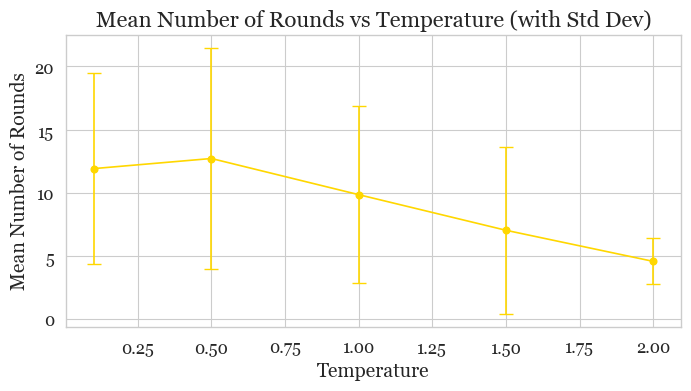

In [19]:
default_rationality = 0.75
df_fixed = df[df['rationality'] == default_rationality]

# Calculate mean and standard deviation
stats = df_fixed.groupby('temperature')['rounds_to_consensus'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(7, 4))
plt.errorbar(stats['temperature'], stats['mean'], yerr=stats['std'], fmt='-o', capsize=5)
plt.title('Mean Number of Rounds vs Temperature (with Std Dev)')
plt.xlabel('Temperature')
plt.ylabel('Mean Number of Rounds')
plt.grid(True)
plt.tight_layout()
plt.show()

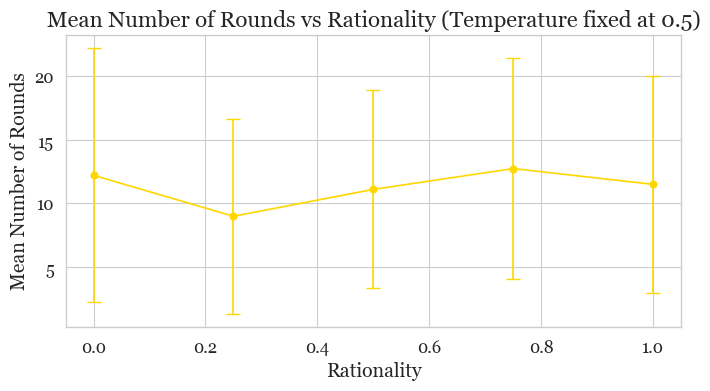

In [20]:
# Fix the temperature value
fixed_temperature = 0.50
df_fixed = df[df['temperature'] == fixed_temperature]

# Calculate mean and standard deviation of rounds for each rationality
stats = df_fixed.groupby('rationality')['rounds_to_consensus'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(7, 4))
plt.errorbar(stats['rationality'], stats['mean'], yerr=stats['std'], fmt='-o', capsize=5)
plt.title(f'Mean Number of Rounds vs Rationality (Temperature fixed at {fixed_temperature})')
plt.xlabel('Rationality')
plt.ylabel('Mean Number of Rounds')
plt.grid(True)
plt.tight_layout()
plt.show()

Okay, now we know from lectures that OFAT isn't the best local sensitivity analysis method when you have multiple parameters that influence each other, because OFAT doesn't take into account these interactions. Let's move on to other methods we saw in classes, that are global methods. 

The elementary Effect method: Morris application

                   mu   mu_star     sigma  mu_star_conf
temperature -8.811224  8.811224  2.056958      0.624094
rationality -0.239167  1.061184  1.551120      0.300601


/opt/homebrew/lib/python3.10/site-packages/SALib/sample/morris/morris.py:372: UserWarning: num_levels should be an even number, sample may be biased
  warnings.warn("num_levels should be an even number, " "sample may be biased")


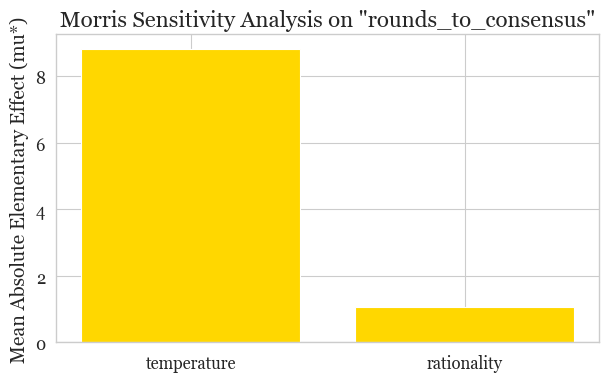

In [21]:
# List all valid discrete values
temperature_values = sorted(df['temperature'].unique())
rationality_values = sorted(df['rationality'].unique())

# Define the problem for SALib
problem = {
    'num_vars': 2,
    'names': ['temperature', 'rationality'],
    'bounds': [
        [min(temperature_values), max(temperature_values)],
        [min(rationality_values), max(rationality_values)],
    ]
}

# Generate Morris samples (in continuous space)
N = 50  # Number of trajectories (increase for more robust results)
num_levels = max(len(temperature_values), len(rationality_values))
param_values = morris_sample.sample(problem, N, num_levels=num_levels, optimal_trajectories=None)

# Map the continuous samples to the nearest allowed discrete value
def closest(x, val_list):
    return min(val_list, key=lambda v: abs(v - x))

mapped_samples = []
for temp, rat in param_values:
    mapped_temp = closest(temp, temperature_values)
    mapped_rat = closest(rat, rationality_values)
    mapped_samples.append([mapped_temp, mapped_rat])
mapped_samples = np.array(mapped_samples)

# Evaluate the model (get output for each sampled parameter set)
# Here, output is the mean number of rounds_to_consensus for each parameter set
def get_output(temp, rat):
    subset = df[(df['temperature'] == temp) & (df['rationality'] == rat)]
    if not subset.empty:
        return subset['rounds_to_consensus'].mean()
    else:
        return np.nan

Y = np.array([get_output(temp, rat) for temp, rat in mapped_samples])

# Remove NaNs (if any combinations are not present in your data)
valid = ~np.isnan(Y)
Y = Y[valid]
mapped_samples = mapped_samples[valid]

# Morris analysis
Si = morris_analyze.analyze(problem, mapped_samples, Y, conf_level=0.95, print_to_console=True)

# Plot the results
plt.figure(figsize=(7,4))
plt.bar(problem['names'], Si['mu_star'])
plt.ylabel('Mean Absolute Elementary Effect (mu*)')
plt.title('Morris Sensitivity Analysis on "rounds_to_consensus"')
plt.show()

The value of mu* (mu_star) for temperature is very high, indicating that this parameter has a strong influence on the output. Rationality also shows a high mu*, meaning it is influential as well, although less so than rationality. This confirms that our choice to focus on these two parameters was appropriate, allowing us to fix the more technical ones.

Both parameters also have high sigma values. This suggests the presence of non-linear effects or interactions between parameters. However, as discussed in the lectures, the Morris method alone does not allow us to fully disentangle the nature of these effects; it only signals their possible presce. I I picked 50 trajectories to have a good equilibrium between computation cost and stability. e.

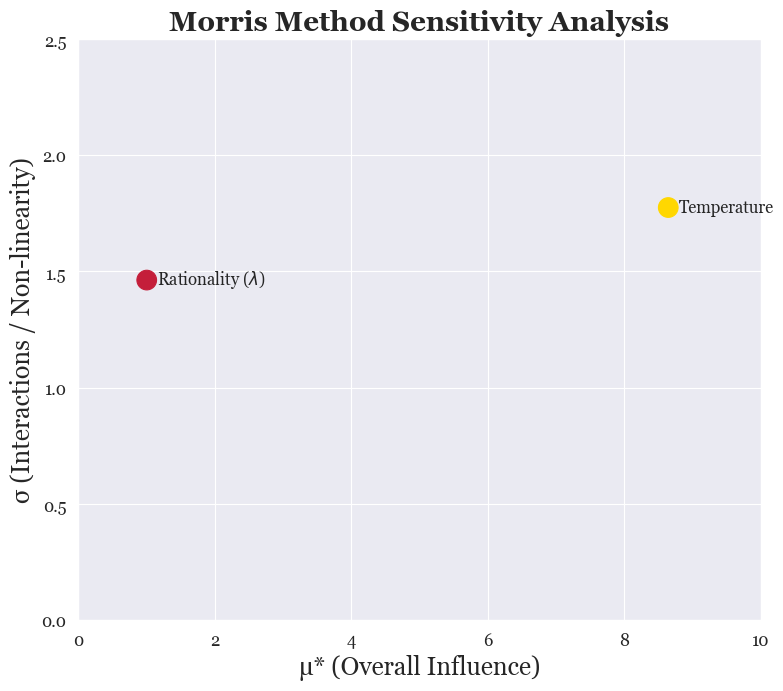

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make sure your plotting_theme is imported at the top of your notebook
# import plotting_theme

# --- Data for the Morris Plot ---
params = ['Temperature', 'Rationality ($\\lambda$)']
mu_star = [8.643193, 1.005317]
sigma = [1.775123, 1.462853]

# --- Create the Plot ---
plt.figure(figsize=(8, 7))

# Apply the darkgrid style for consistency with other plots
sns.set_style("darkgrid")

# Scatter plot for the parameters using the papal color theme
# Using Gold for Temperature and Cardinal Red for Rationality
colors = [plotting_theme.papal_colors[0], plotting_theme.papal_colors[1]]
plt.scatter(mu_star, sigma, color=colors, s=200, zorder=10)

# --- Add Annotations and Context ---
# Add text labels next to each point for clarity
font_properties = {'family': 'Georgia', 'size': 12}
for i, param in enumerate(params):
    plt.text(mu_star[i] + 0.15, sigma[i], param, fontdict=font_properties, va='center')


# --- Final Touches ---
plt.title('Morris Method Sensitivity Analysis', fontfamily='Georgia', fontsize=20, fontweight='bold')
plt.xlabel('μ* (Overall Influence)', fontfamily='Georgia', fontsize=18)
plt.ylabel('σ (Interactions / Non-linearity)', fontfamily='Georgia', fontsize=18)

# Set plot limits for better focus
plt.xlim(0, 10)
plt.ylim(0, 2.5)

# Set tick label fonts
plt.xticks(fontfamily='Georgia')
plt.yticks(fontfamily='Georgia')

plt.tight_layout()
plt.savefig("morris_method_styled.png", dpi=300)
plt.show()


Regression based sensitivity for ABMS : local 

Here we are going to test two hypothesis, we are gonna check if we have a linear regression ( by checking the coefficient of determination), if the coefficient of determination is close to 0, we can conclude we have linear effects. Then, we'll perform a SOBOL analysis to see if we have interactions between our two parameters. Let's start with temperature, and then we'll move on to rationality. 

   temperature  rounds_to_consensus
0          0.1            13.362500
1          0.5            11.315589
2          1.0             9.453875
3          1.5             6.963415
4          2.0             4.172549
                             OLS Regression Results                            
Dep. Variable:     rounds_to_consensus   R-squared:                       0.996
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     684.8
Date:                 Mon, 30 Jun 2025   Prob (F-statistic):           0.000122
Time:                         12:48:09   Log-Likelihood:                0.63606
No. Observations:                    5   AIC:                             2.728
Df Residuals:                        3   BIC:                             1.947
Df Model:                            1                                         
Covariance Type:             nonrobust                          

/opt/homebrew/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


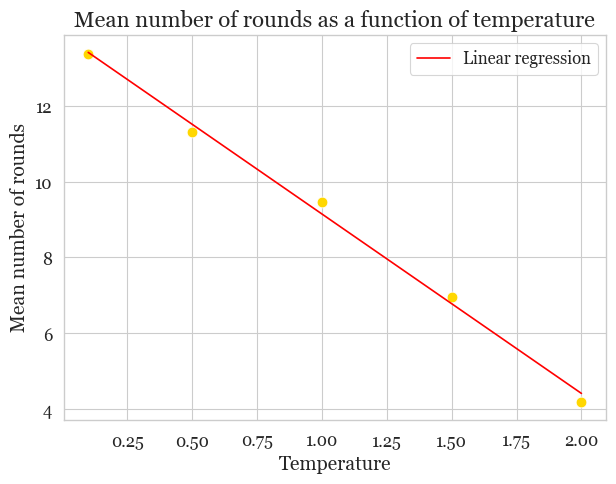

In [23]:
# Calculate mean rounds for each temperature value
grouped = df.groupby('temperature')['rounds_to_consensus'].mean().reset_index()
print(grouped)

# Linear regression: mean(rounds_to_consensus) ~ temperature
X = grouped['temperature']
y = grouped['rounds_to_consensus']

# Add constant (intercept) to the model
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Show the summary
print(model.summary())

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x='temperature', y='rounds_to_consensus', data=grouped, s=60)
plt.plot(grouped['temperature'], model.predict(X_const), color='red', label='Linear regression')
plt.xlabel('Temperature')
plt.ylabel('Mean number of rounds')
plt.title('Mean number of rounds as a function of temperature')
plt.legend()
plt.show()

R-squared: 0.996, that's remarkably close to 1. Our hypothesis regarding linearity for temperature seems to be confirmed. Let's check for rationality as well, before doing our sobol analysis. 

   rationality  rounds_to_consensus
0         0.00             9.142857
1         0.25             8.632411
2         0.50             9.027668
3         0.75             9.256809
4         1.00             9.117886
                             OLS Regression Results                            
Dep. Variable:     rounds_to_consensus   R-squared:                       0.144
Model:                             OLS   Adj. R-squared:                 -0.142
Method:                  Least Squares   F-statistic:                    0.5030
Date:                 Mon, 30 Jun 2025   Prob (F-statistic):              0.529
Time:                         12:48:09   Log-Likelihood:                0.99240
No. Observations:                    5   AIC:                             2.015
Df Residuals:                        3   BIC:                             1.234
Df Model:                            1                                         
Covariance Type:             nonrobust                          

/opt/homebrew/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


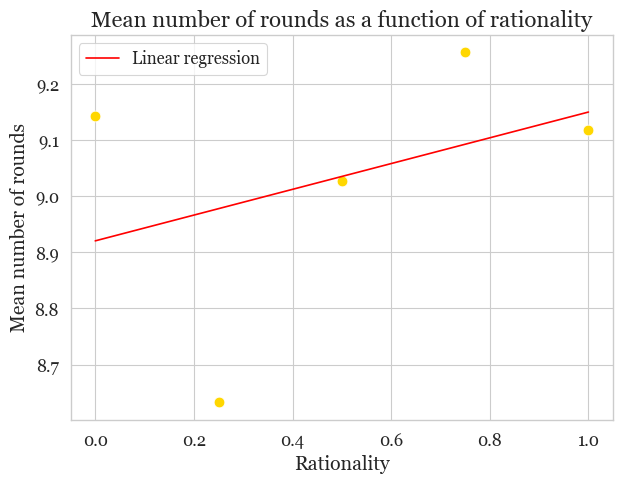

In [24]:
# Calculate the mean rounds for each rationality value
grouped = df.groupby('rationality')['rounds_to_consensus'].mean().reset_index()
print(grouped)

# Linear regression: mean(rounds_to_consensus) ~ rationality
X = grouped['rationality']
y = grouped['rounds_to_consensus']

# Add constant (intercept) to the model
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Show the summary
print(model.summary())

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x='rationality', y='rounds_to_consensus', data=grouped, s=60)
plt.plot(grouped['rationality'], model.predict(X_const), color='red', label='Linear regression')
plt.xlabel('Rationality')
plt.ylabel('Mean number of rounds')
plt.title('Mean number of rounds as a function of rationality')
plt.legend()
plt.show()

Again,  R-squared: 0.154, is quite low, our hypothesis regarding linearity seems quite wrong for rationality. 

Therefore, we move on to SOBOL to be able to see if it's due to interactions between parameters etc for the number of rounds.  

The Sobol sensitivity analysis shows that both temperature and rationality have relatively low first-order (main) effects, with S1 values of 0.20 for temperature and 0.10 for rationality. This means that, on their own, these parameters only explain a small part of the variance in the mean number of rounds.

However, their total effects (ST) are much higher: 0.92 for temperature and 0.72 for rationality. This indicates that when accounting for both their individual and interactive (nonlinear) contributions, each parameter explains a much larger portion of the variance.

Furthermore, the second-order interaction index (S2) between temperature and rationality is 0.65, which is substantial. This high interaction value demonstrates that a large part of the variance is explained not by each parameter individually, but by the nonlinear interaction between temperature and rationality.

In summary, most of the variability in the model output is not due to the linear, isolated contributions of temperature and rationality, but rather to their combined, nonlinear effects. This highlights that capturing these interactions is crucial for understanding and predicting the behavior of the system.

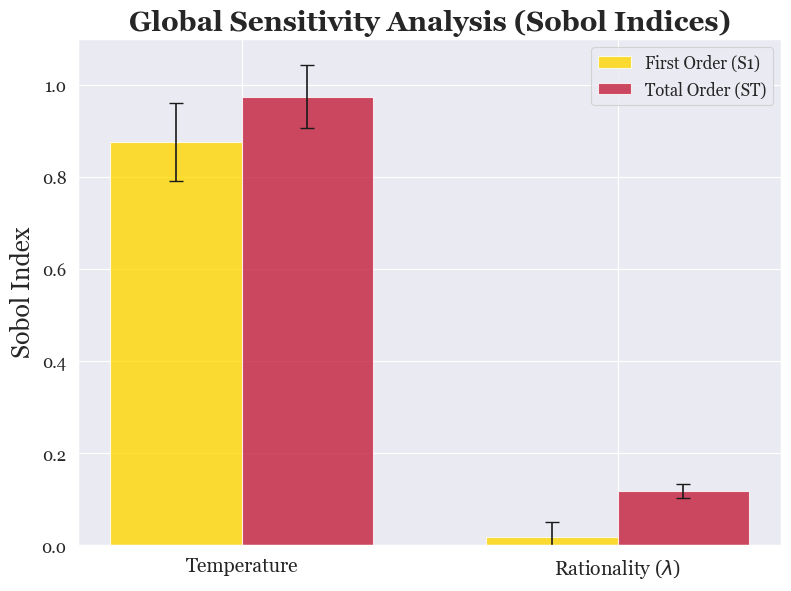

In [43]:
import pandas as pd
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your plotting_theme is imported at the top of your notebook
# import plotting_theme

# Load your dataframe 'df' here
# df = pd.read_csv(...)

# To match the background style of other plots, set the style here.
sns.set_style("darkgrid")

# --- Data Preparation for Sobol Analysis ---
# (Assuming the 'problem' dictionary and 'Y_valid' array are already computed as in your original code)
problem = {
    'num_vars': 2,
    'names': ['Temperature', 'Rationality ($\\lambda$)'], # Capitalized for better display
    'bounds': [[df['temperature'].min(), df['temperature'].max()], [df['rationality'].min(), df['rationality'].max()]]
}
# ... (rest of your SALib data preparation code) ...
# For demonstration, I'll create dummy Si values. Use your actual 'Si' dictionary.
Si = {
    'S1': np.array([0.8765, 0.0184]),
    'S1_conf': np.array([0.0837, 0.0336]),
    'ST': np.array([0.9750, 0.1183]),
    'ST_conf': np.array([0.0683, 0.0147])
}


# --- Create the Styled Plot ---
labels = problem['names']
S1 = Si['S1']
S1_conf = Si['S1_conf']
ST = Si['ST']
ST_conf = Si['ST_conf']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Bar plot with confidence intervals, using the papal color theme
# Using Gold for S1 and Cardinal Red for ST
rects1 = ax.bar(x - width/2, np.clip(S1, 0, 1), width, yerr=S1_conf, capsize=5, 
                label='First Order (S1)', color=plotting_theme.papal_colors[0], alpha=0.8)
rects2 = ax.bar(x + width/2, np.clip(ST, 0, 1), width, yerr=ST_conf, capsize=5, 
                label='Total Order (ST)', color=plotting_theme.papal_colors[1], alpha=0.8)

# --- Final Touches ---
ax.set_ylabel('Sobol Index', fontfamily='Georgia', fontsize=18)
ax.set_title('Global Sensitivity Analysis (Sobol Indices)', fontfamily='Georgia', fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontfamily='Georgia', fontsize=14)
ax.legend(prop={'family': 'Georgia', 'size': 12})
ax.set_ylim(0, 1.1)

# Set tick label fonts
for label in ax.get_yticklabels():
    label.set_fontname('Georgia')

plt.tight_layout()
plt.savefig("sobol_analysis_styled.png", dpi=300)
plt.show()


/var/folders/5x/knqn___d1r50msn5fsjkd_jr0000gn/T/ipykernel_65709/1555625352.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_rat = model_rat.pvalues[1] # p-value for the slope
/var/folders/5x/knqn___d1r50msn5fsjkd_jr0000gn/T/ipykernel_65709/1555625352.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_temp = model_temp.pvalues[1]


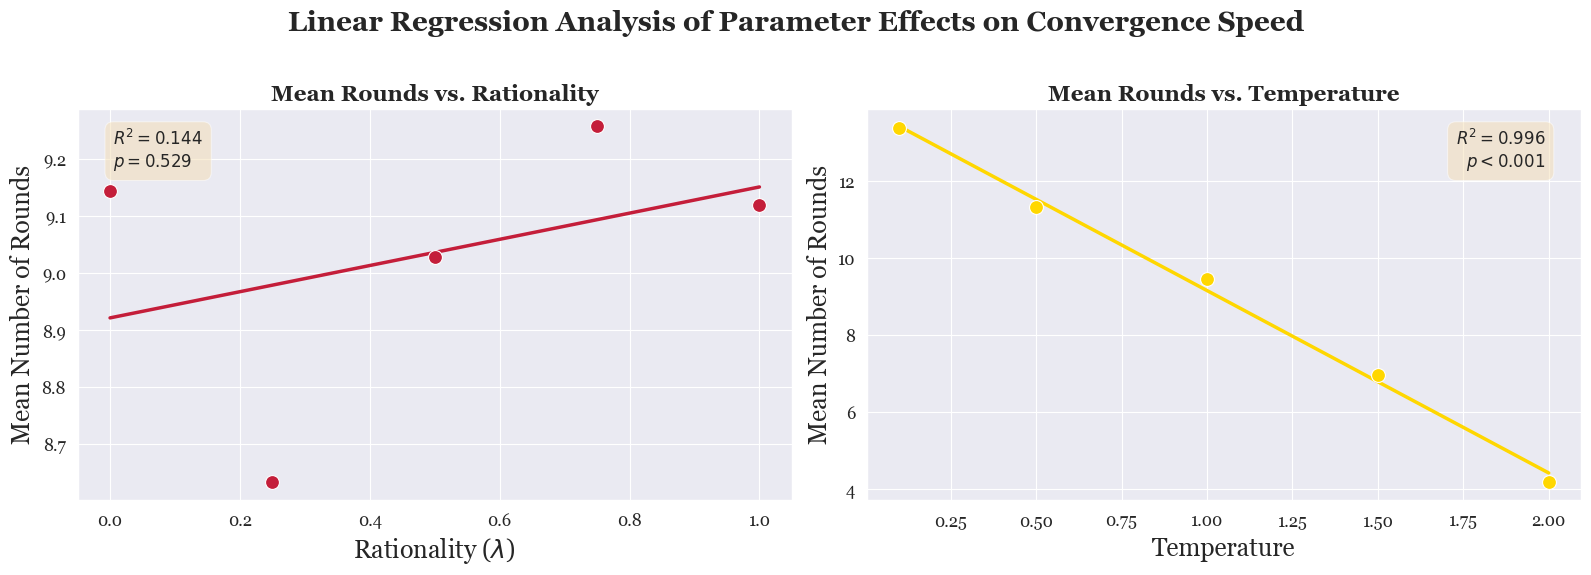

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Make sure your plotting_theme is imported at the top of your notebook
# import plotting_theme

# Load your dataframe 'df' here if it's not already loaded
# df = pd.read_csv(...)

# To match the background style of other plots, set the style here.
sns.set_style("darkgrid")

# --- Data Preparation for Regression ---
# Group by rationality
grouped_rat = df.groupby('rationality')['rounds_to_consensus'].mean().reset_index()
X_rat = grouped_rat['rationality']
y_rat = grouped_rat['rounds_to_consensus']
X_const_rat = sm.add_constant(X_rat)
model_rat = sm.OLS(y_rat, X_const_rat).fit()

# Group by temperature
grouped_temp = df.groupby('temperature')['rounds_to_consensus'].mean().reset_index()
X_temp = grouped_temp['temperature']
y_temp = grouped_temp['rounds_to_consensus']
X_const_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y_temp, X_const_temp).fit()

# --- Create the Combined Plot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)
fig.suptitle('Linear Regression Analysis of Parameter Effects on Convergence Speed', fontsize=20, fontweight='bold', fontfamily='Georgia')

# --- Subplot 1: Rationality ---
# Use a single color from the theme
rat_color = plotting_theme.papal_colors[1] # Cardinal Red
sns.scatterplot(x='rationality', y='rounds_to_consensus', data=grouped_rat, s=100, ax=axes[0], color=rat_color, zorder=10)
axes[0].plot(grouped_rat['rationality'], model_rat.predict(X_const_rat), color=rat_color, linewidth=2.5)

# Add annotations for R-squared and p-value
r_squared_rat = model_rat.rsquared
p_value_rat = model_rat.pvalues[1] # p-value for the slope
axes[0].text(0.05, 0.95, f'$R^2 = {r_squared_rat:.3f}$\n$p = {p_value_rat:.3f}$', 
             transform=axes[0].transAxes, fontsize=12, va='top', family='Georgia',
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

axes[0].set_title('Mean Rounds vs. Rationality', fontweight='bold', fontfamily='Georgia', fontsize=16)
axes[0].set_xlabel('Rationality ($\\lambda$)', fontfamily='Georgia', fontsize=18)
axes[0].set_ylabel('Mean Number of Rounds', fontfamily='Georgia', fontsize=18)


# --- Subplot 2: Temperature ---
# Use a single color from the theme
temp_color = plotting_theme.papal_colors[0] # Gold
sns.scatterplot(x='temperature', y='rounds_to_consensus', data=grouped_temp, s=100, ax=axes[1], color=temp_color, zorder=10)
axes[1].plot(grouped_temp['temperature'], model_temp.predict(X_const_temp), color=temp_color, linewidth=2.5)

# Add annotations for R-squared and p-value
r_squared_temp = model_temp.rsquared
p_value_temp = model_temp.pvalues[1]
axes[1].text(0.95, 0.95, f'$R^2 = {r_squared_temp:.3f}$\n$p < 0.001$', 
             transform=axes[1].transAxes, fontsize=12, va='top', ha='right', family='Georgia',
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

axes[1].set_title('Mean Rounds vs. Temperature', fontweight='bold', fontfamily='Georgia', fontsize=16)
axes[1].set_xlabel('Temperature', fontfamily='Georgia', fontsize=18)
axes[1].set_ylabel('Mean Number of Rounds', fontfamily='Georgia', fontsize=18)

# --- Final Touches ---
# Set tick label fonts for both axes
for ax in axes:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Georgia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("regression_styled.png", dpi=300)
plt.show()
